#### Análise Explorátoria de Dados :  Registro de Acidentes de trânsito da Polícia Rodoviária Federal (PRF)-2019
By Gilson Castro



Os acidentes  rodoviarios são as principais  causas de morbidade e mortalidade violentas , estes mesmos provocam prejuizos econômicos e psicológicos sobretudo para  as familias das vitimas. O registro desses acidentes são de grande importância para o desenvolvimento de soluções voltadas para **segurança viária** como também politicas públicas com objetivo de reduzir a mortalidade .

Segundo [Bringmann, P. B., Ferreira, et al (2014)](https://www.scielo.br/scielo.php?pid=S1413-81232014001204861&script=sci_arttext&tlng=pt) Mais da metade das vítimas fatais possui entre 15 e 44 anos, essas vitimas que se encontram na época mais produtiva de suas vidas. As projeções indicam que até o ano de 2020 essas mortes terão um decréscimo nos países de alta renda. Porém, aumentarão consideravelmente nos países de média e baixa renda, passando a ocupar a sexta posição na lista das principais causas de morte mundiais.


Para entender o problema foi realizada uma pequena análise explorátoria de dados que visa identificar , caratecrizar o perfil e explorar o conjunto de dados afim de apresentar as circunstâncias que contribuíram para o envolvimento das pessoas nos acidentes rodoviarios em 2019.O fator humano , a desatenção tem um grande impacto nos acidentes para isso , vamos comprovar através dessa análise.



## Base de dados
A base de dados escolhida foi da **Polícia Rodoviária Federal** , segundo a PRF é realizado um registro de acidentes através do sistema BR-Brasil, que coleta informações referentes aos envolvidos (identificação, estado físico, se era passageiro, condutor, etc.). No site está disponivel os acidentes por ocorrência , por pessoa e todas as causas.

[Acesse aqui a base de dados](https://portal.prf.gov.br/dados-abertos-acidentes)


In [69]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# esse comando serve para mostrar os gráficos dentro do nosso notebook
%matplotlib inline 

#carregando dados
df=pd.read_csv('acid2019.csv', delimiter=";", encoding='latin1')
#visualizando a primeiras 5 linhas
df.head(5)


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR


In [68]:
# viusulizando últimas linhas
df.tail()

,dia_semana,horario,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo
272064,terça-feira,00:10:00,PR,369.0,ARAPONGAS,Falta de Atenção à Condução,Capotamento,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Automóvel,Condutor,Ileso,45.0,Masculino
272065,terça-feira,00:10:00,PR,369.0,ARAPONGAS,Velocidade Incompatível,Colisão traseira,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Automóvel,Condutor,Ileso,45.0,Masculino
272066,terça-feira,00:10:00,PR,369.0,ARAPONGAS,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Automóvel,Condutor,Ileso,45.0,Masculino
272067,terça-feira,00:10:00,PR,369.0,ARAPONGAS,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Automóvel,Condutor,Lesões Graves,46.0,Masculino
272068,terça-feira,00:10:00,PR,369.0,ARAPONGAS,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Automóvel,Condutor,Lesões Graves,46.0,Masculino


In [4]:
# dimensão linhas x colunas do conjunto de dados
df.shape

(272070, 37)

In [5]:
#informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272070 entries, 0 to 272069
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      272070 non-null  float64
 1   pesid                   251469 non-null  float64
 2   data_inversa            272070 non-null  object 
 3   dia_semana              272070 non-null  object 
 4   horario                 272069 non-null  object 
 5   uf                      272069 non-null  object 
 6   br                      271733 non-null  float64
 7   km                      271733 non-null  object 
 8   municipio               272069 non-null  object 
 9   causa_principal         272069 non-null  object 
 10  causa_acidente          272069 non-null  object 
 11  ordem_tipo_acidente     272029 non-null  float64
 12  tipo_acidente           272029 non-null  object 
 13  classificacao_acidente  272069 non-null  object 
 14  fase_dia            

In [6]:
#removendo colunas desnecessárias para análise 

# criamos uma lista de colunas para remoção
colunas=['km','id','pesid','ordem_tipo_acidente','id_veiculo','mortos','latitude','longitude','regional','delegacia'
        ,'uop','uso_solo','marca','ano_fabricacao_veiculo','causa_principal','feridos_leves','feridos_graves','ilesos','mortos',
         'data_inversa','sentido_via','tracado_via']
# passamos para a função que remove colunas
df.drop(colunas,axis=1,inplace=True)
df.head()

,dia_semana,horario,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo
0,terça-feira,01:30:00,SP,116.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Automóvel,Passageiro,Lesões Leves,34.0,Masculino
1,terça-feira,01:30:00,SP,116.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Automóvel,Passageiro,Lesões Leves,18.0,Masculino
2,terça-feira,01:30:00,SP,116.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Automóvel,Passageiro,Lesões Leves,34.0,Feminino
3,terça-feira,01:30:00,SP,116.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Automóvel,Condutor,Lesões Leves,27.0,Masculino
4,terça-feira,01:30:00,PR,373.0,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Motoneta,Condutor,Lesões Leves,42.0,Masculino


In [8]:
# resumo númerico ou estatistico dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
br,271733.0,220.587209,131.192739,10.0,101.0,163.0,364.0,495.0
idade,220878.0,40.440605,65.348944,0.0,27.0,37.0,48.0,2018.0


Note que a idade média é de 40 anos das vitimas de acidentes 

In [10]:
# verifica as colunas
df.columns

Index(['dia_semana', 'horario', 'uf', 'br', 'municipio', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tipo_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo'],
      dtype='object')

In [17]:
# selecionando indices e colunas com LOC
df.loc[[1,2,3,4,5,6,7,8,9,10], ['uf','sexo','causa_acidente']]

,uf,sexo,causa_acidente
1,SP,Masculino,Falta de Atenção à Condução
2,SP,Feminino,Falta de Atenção à Condução
3,SP,Masculino,Falta de Atenção à Condução
4,PR,Masculino,Falta de Atenção à Condução
5,SC,Feminino,Animais na Pista
6,CE,Feminino,Ingestão de Substâncias Psicoativas
7,MG,Masculino,Falta de Atenção à Condução
8,MG,Masculino,Falta de Atenção à Condução
9,SC,Masculino,Ingestão de Substâncias Psicoativas
10,MS,Não Informado,Animais na Pista


## Limpeza dos dados

In [9]:
# aqui vamos verificar os valores faltantes em cada coluna 
df.isnull().sum()

dia_semana                    0
horario                       1
uf                            1
br                          337
municipio                     1
causa_acidente                1
tipo_acidente                41
classificacao_acidente        1
fase_dia                      1
condicao_metereologica        1
tipo_pista                    1
tipo_veiculo                  1
tipo_envolvido                1
estado_fisico                 1
idade                     51192
sexo                          1
dtype: int64

In [21]:
#REMOÇÃO DE VALORES AUSENTES 
# shape antes
shape_antes= df.shape
print("Antes:\t",shape_antes)
df.dropna(subset=['br','tipo_acidente','classificacao_acidente','fase_dia','condicao_metereologica',
                 'tipo_pista','tipo_veiculo','tipo_envolvido','estado_fisico','sexo','horario','uf','idade']
                 ,inplace=True)
#shape depois
shape_depois=df.shape
print("Depois:\t",shape_depois)

Antes:	 (271693, 16)
Depois:	 (220587, 16)


In [22]:
#verica se existe valores ausentes novamente
df.isnull().sum()

dia_semana                0
horario                   0
uf                        0
br                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
dtype: int64

In [11]:
# tipo de dados
df.dtypes

dia_semana                 object
horario                    object
uf                         object
br                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
condicao_metereologica     object
tipo_pista                 object
tipo_veiculo               object
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
dtype: object

## Visualização dos dados

In [27]:
#contagem por sexo
df['sexo'].value_counts()

Masculino    167060
Feminino      53370
Ignorado        157
Name: sexo, dtype: int64

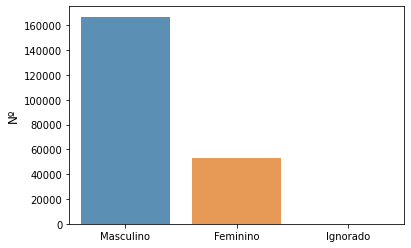

In [28]:
#plotando um gráfico
sexo = df['sexo'].value_counts()
plt.figure()
sns.barplot(sexo.index, sexo.values, alpha=0.8)
plt.title('')
plt.ylabel('Nº', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()


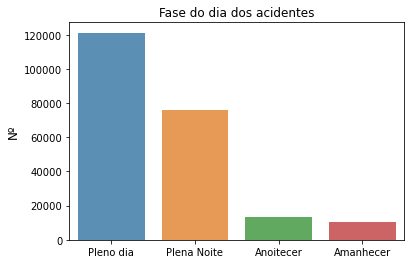

In [55]:
#fase do dia que mais ocorre acidentes
fase = df['fase_dia'].value_counts()
plt.figure()
sns.barplot(fase.index, fase.values, alpha=0.8)
plt.title('Fase do dia dos acidentes')
plt.ylabel('Nº', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

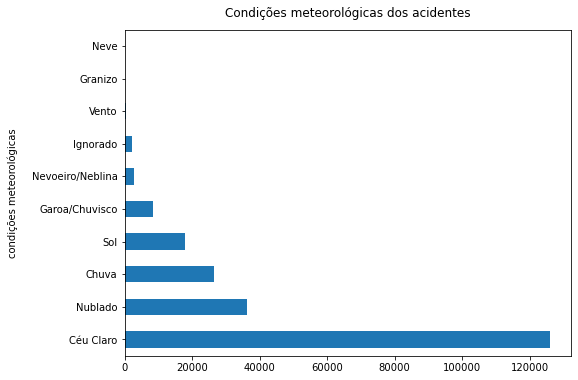

In [56]:
# qual a condição metereológica  dos acidentes ?
df['condicao_metereologica'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("", labelpad=14)
plt.ylabel("condições meteorológicas", labelpad=14)
plt.title("Condições meteorológicas dos acidentes", y=1.02);

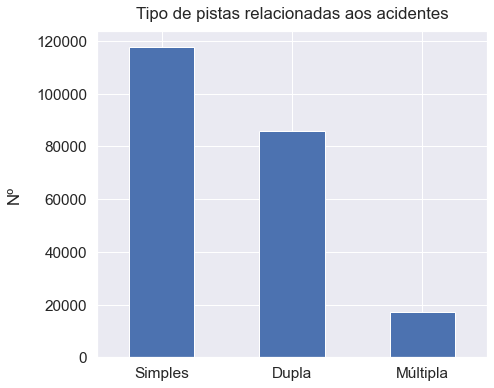

In [57]:
#tipo de pista 
sns.set(font_scale=1.4)
df['tipo_pista'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("", labelpad=14)
plt.ylabel("Nº", labelpad=14)
plt.title("Tipo de pistas relacionadas aos acidentes", y=1.02);

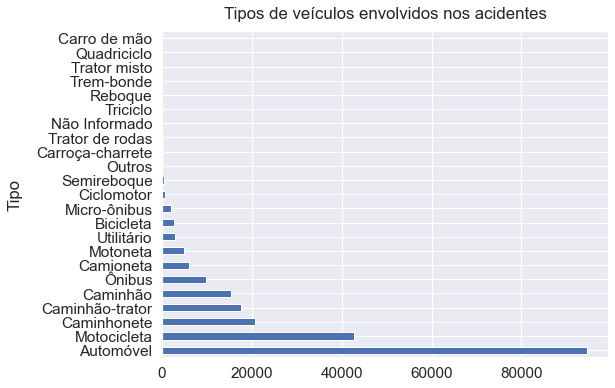

In [58]:
#tipo de veiculo no acidente
df['tipo_veiculo'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("", labelpad=14)
plt.ylabel("Tipo", labelpad=14)
plt.title("Tipos de veículos envolvidos nos acidentes", y=1.02);

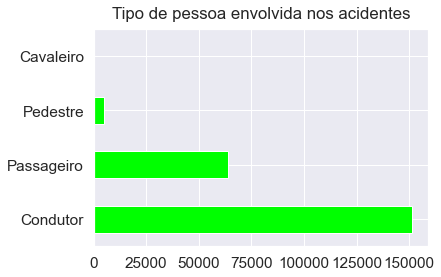

In [59]:
# quem são os envolvidos nos acidentes ?
df['tipo_envolvido'].value_counts().plot(kind='barh',color='#00FF00');
plt.title("Tipo de pessoa envolvida nos acidentes", y=1.02);

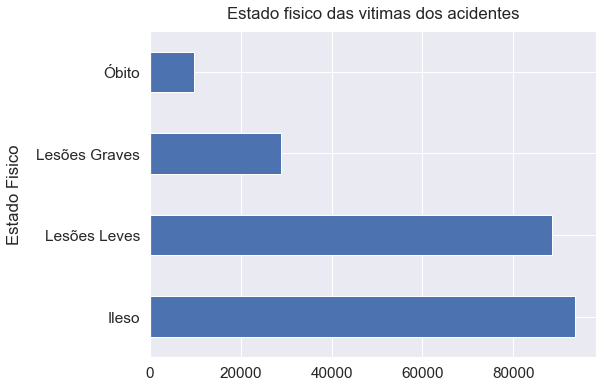

In [60]:
# qual o estado fisico das vitimas de acidentes ?
df['estado_fisico'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("", labelpad=14)
plt.ylabel("Estado Fisico", labelpad=14)
plt.title("Estado fisico das vitimas dos acidentes", y=1.02);

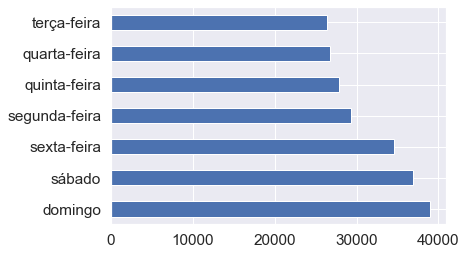

In [61]:
# qual o dia da semana que mais ocorre acidentes ?
fase = df['dia_semana'].value_counts().plot.barh()

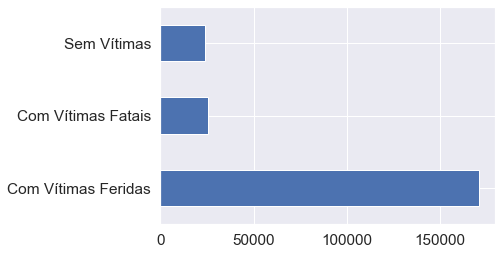

In [62]:
# classificação dos acidentes
df['classificacao_acidente'].value_counts().plot.barh()

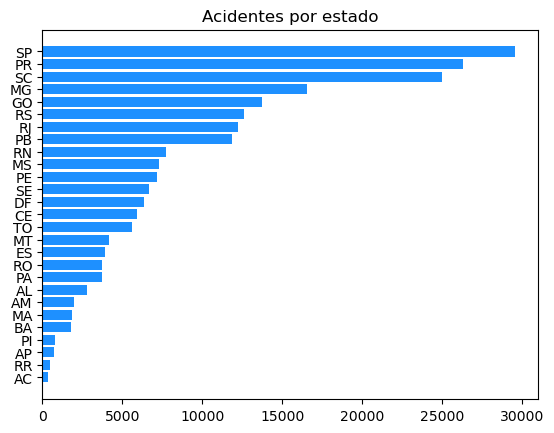

In [66]:
#acidentes por estados
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df['uf'].value_counts()))
values = df['uf'].value_counts()
ufs = df['uf'].unique()

ax.barh(y_pos, values, align='center', color='#1E90FF')
ax.set_yticks(y_pos)
ax.set_yticklabels(ufs)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_title('Acidentes por estado')

plt.show()

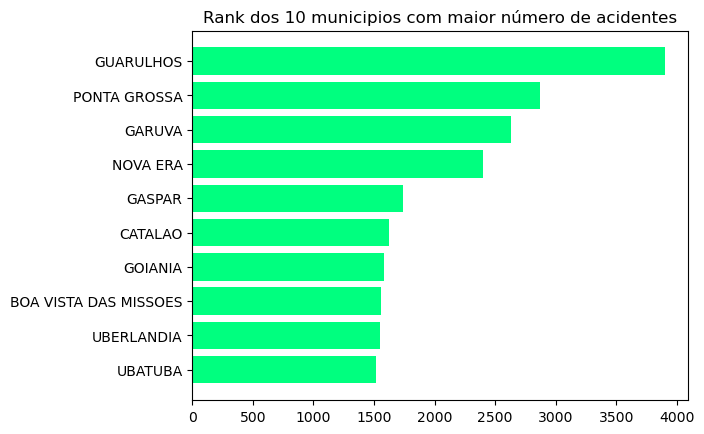

In [65]:
fig, ax = plt.subplots()

y_pos = np.arange(len(df['municipio'].value_counts()[:10]))
values = df['municipio'].value_counts()[:10]
muni = df['municipio'].unique()[:10]

ax.barh(y_pos, values, align='center', color='#00FF7F')
ax.set_yticks(y_pos)
ax.set_yticklabels(muni)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_title('Rank dos 10 municipios com maior número de acidentes')

plt.show()

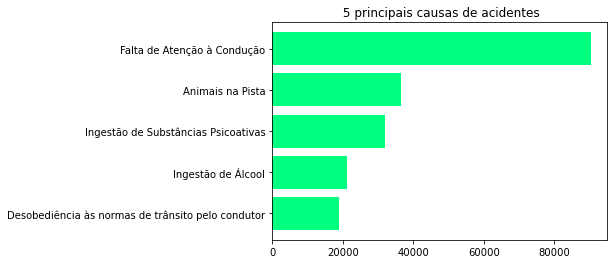

In [71]:
fig, ax = plt.subplots()

y_pos = np.arange(len(df['causa_acidente'].value_counts()[:5]))
values = df['causa_acidente'].value_counts()[:5]
muni = df['causa_acidente'].unique()[:5]

ax.barh(y_pos, values, align='center', color='#00FF7F')
ax.set_yticks(y_pos)
ax.set_yticklabels(muni)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_title(' 5 principais causas de acidentes')

plt.show()

In [73]:

df.groupby('sexo')['causa_acidente'].value_counts()

sexo           causa_acidente                                                                
Feminino       Falta de Atenção à Condução                                                       19160
               Desobediência às normas de trânsito pelo condutor                                  7502
               Velocidade Incompatível                                                            6374
               Não guardar distância de segurança                                                 4349
               Ingestão de Álcool                                                                 3301
                                                                                                 ...  
Não Informado  Desobediência às normas de trânsito pelo pedestre                                   218
               Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo      188
               Ingestão de álcool e/ou substâncias psicoativas pelo pedestre      

### Referências

BRINGMANN, Paulina Bertól et al. Um padrão de envolvimento dos adultos em acidentes rodoviários. Ciência & Saúde Coletiva, v. 19, n. 12, p. 4861-4868, 2014.
https://pandas.pydata.org/

https://paulovasconcellos.com.br/15-comandos-de-matplotlib-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-17cf88a75119

https://minerandodados.com.br/analise-exploratoria-de-dados-passo-a-passo-com-python/